In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
day=pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Searching for missing values

In [3]:
day.shape

(730, 16)

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


###### There are no missing values in our dataset

##### Deleting Columns that are not useful.
    - Instant: Index column has no relation with cnt do dropping it.
    - dteday: We already have year, month and day comumns so dropping the dteday column.
    - casual and registered: Deleting this column because we have cnt column that has the combination of both the values.

In [6]:
day.drop(["instant","dteday","casual","registered"], axis=1, inplace=True)

In [7]:
day.shape

(730, 12)

##### Converting weathersit and season to categorical variables

In [8]:
day.weathersit.replace({1:'Clear',2:'Moderate',3:'Bad',4:'Severe'},inplace = True)
day.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)


In [9]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [96]:
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=day)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=day, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

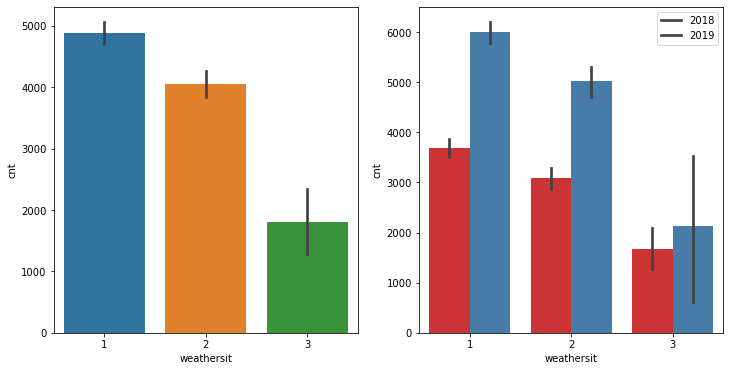

In [97]:
plot_cat_columns('weathersit')

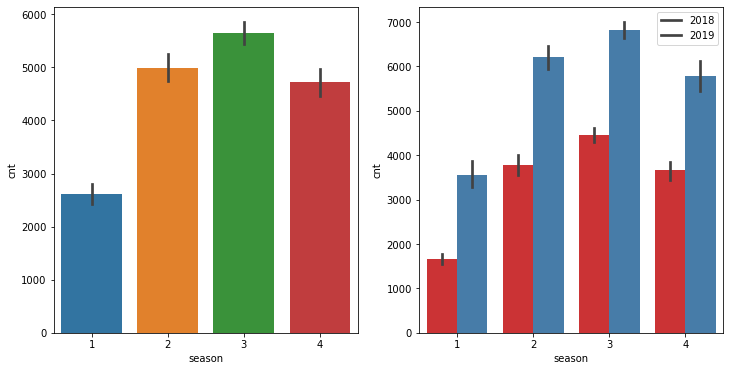

In [98]:
plot_cat_columns('season')

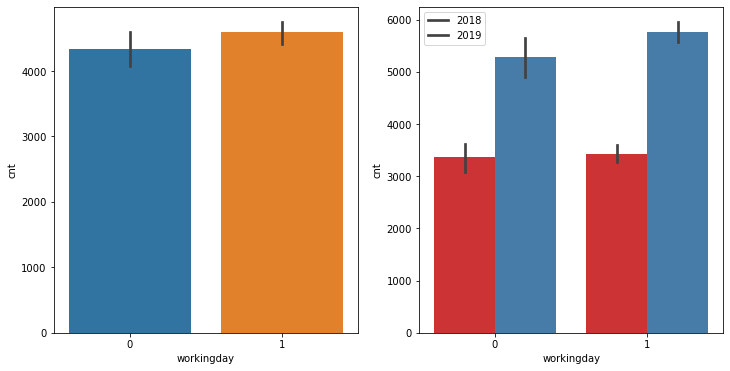

In [99]:
plot_cat_columns('workingday')

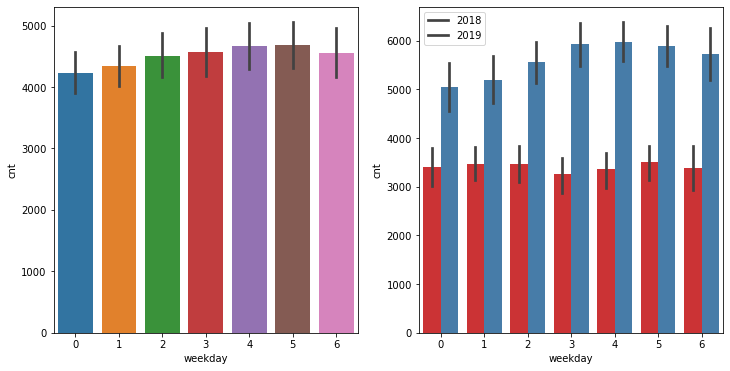

In [100]:
plot_cat_columns('weekday')

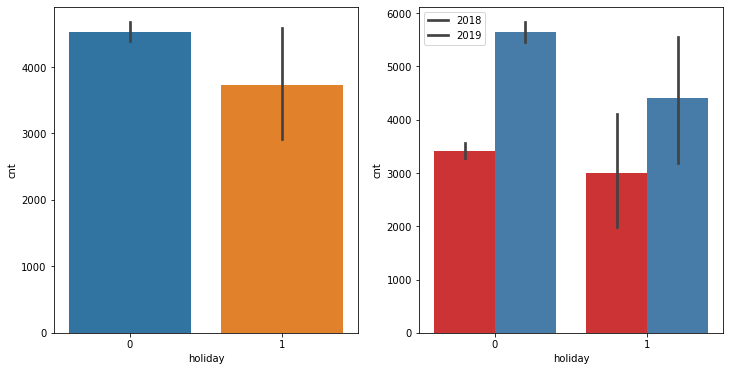

In [101]:
plot_cat_columns('holiday')

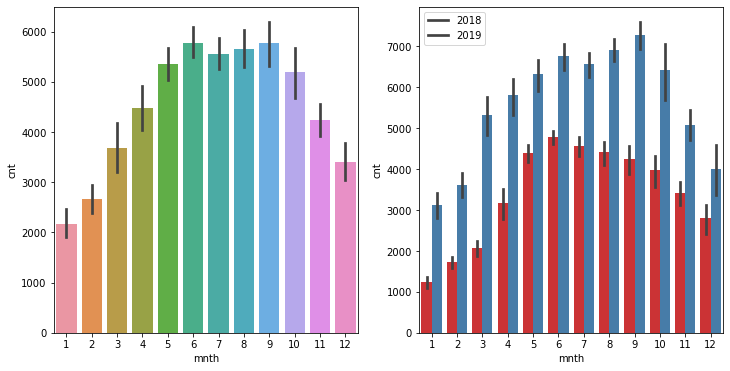

In [102]:
plot_cat_columns('mnth')

##### Data Visualization

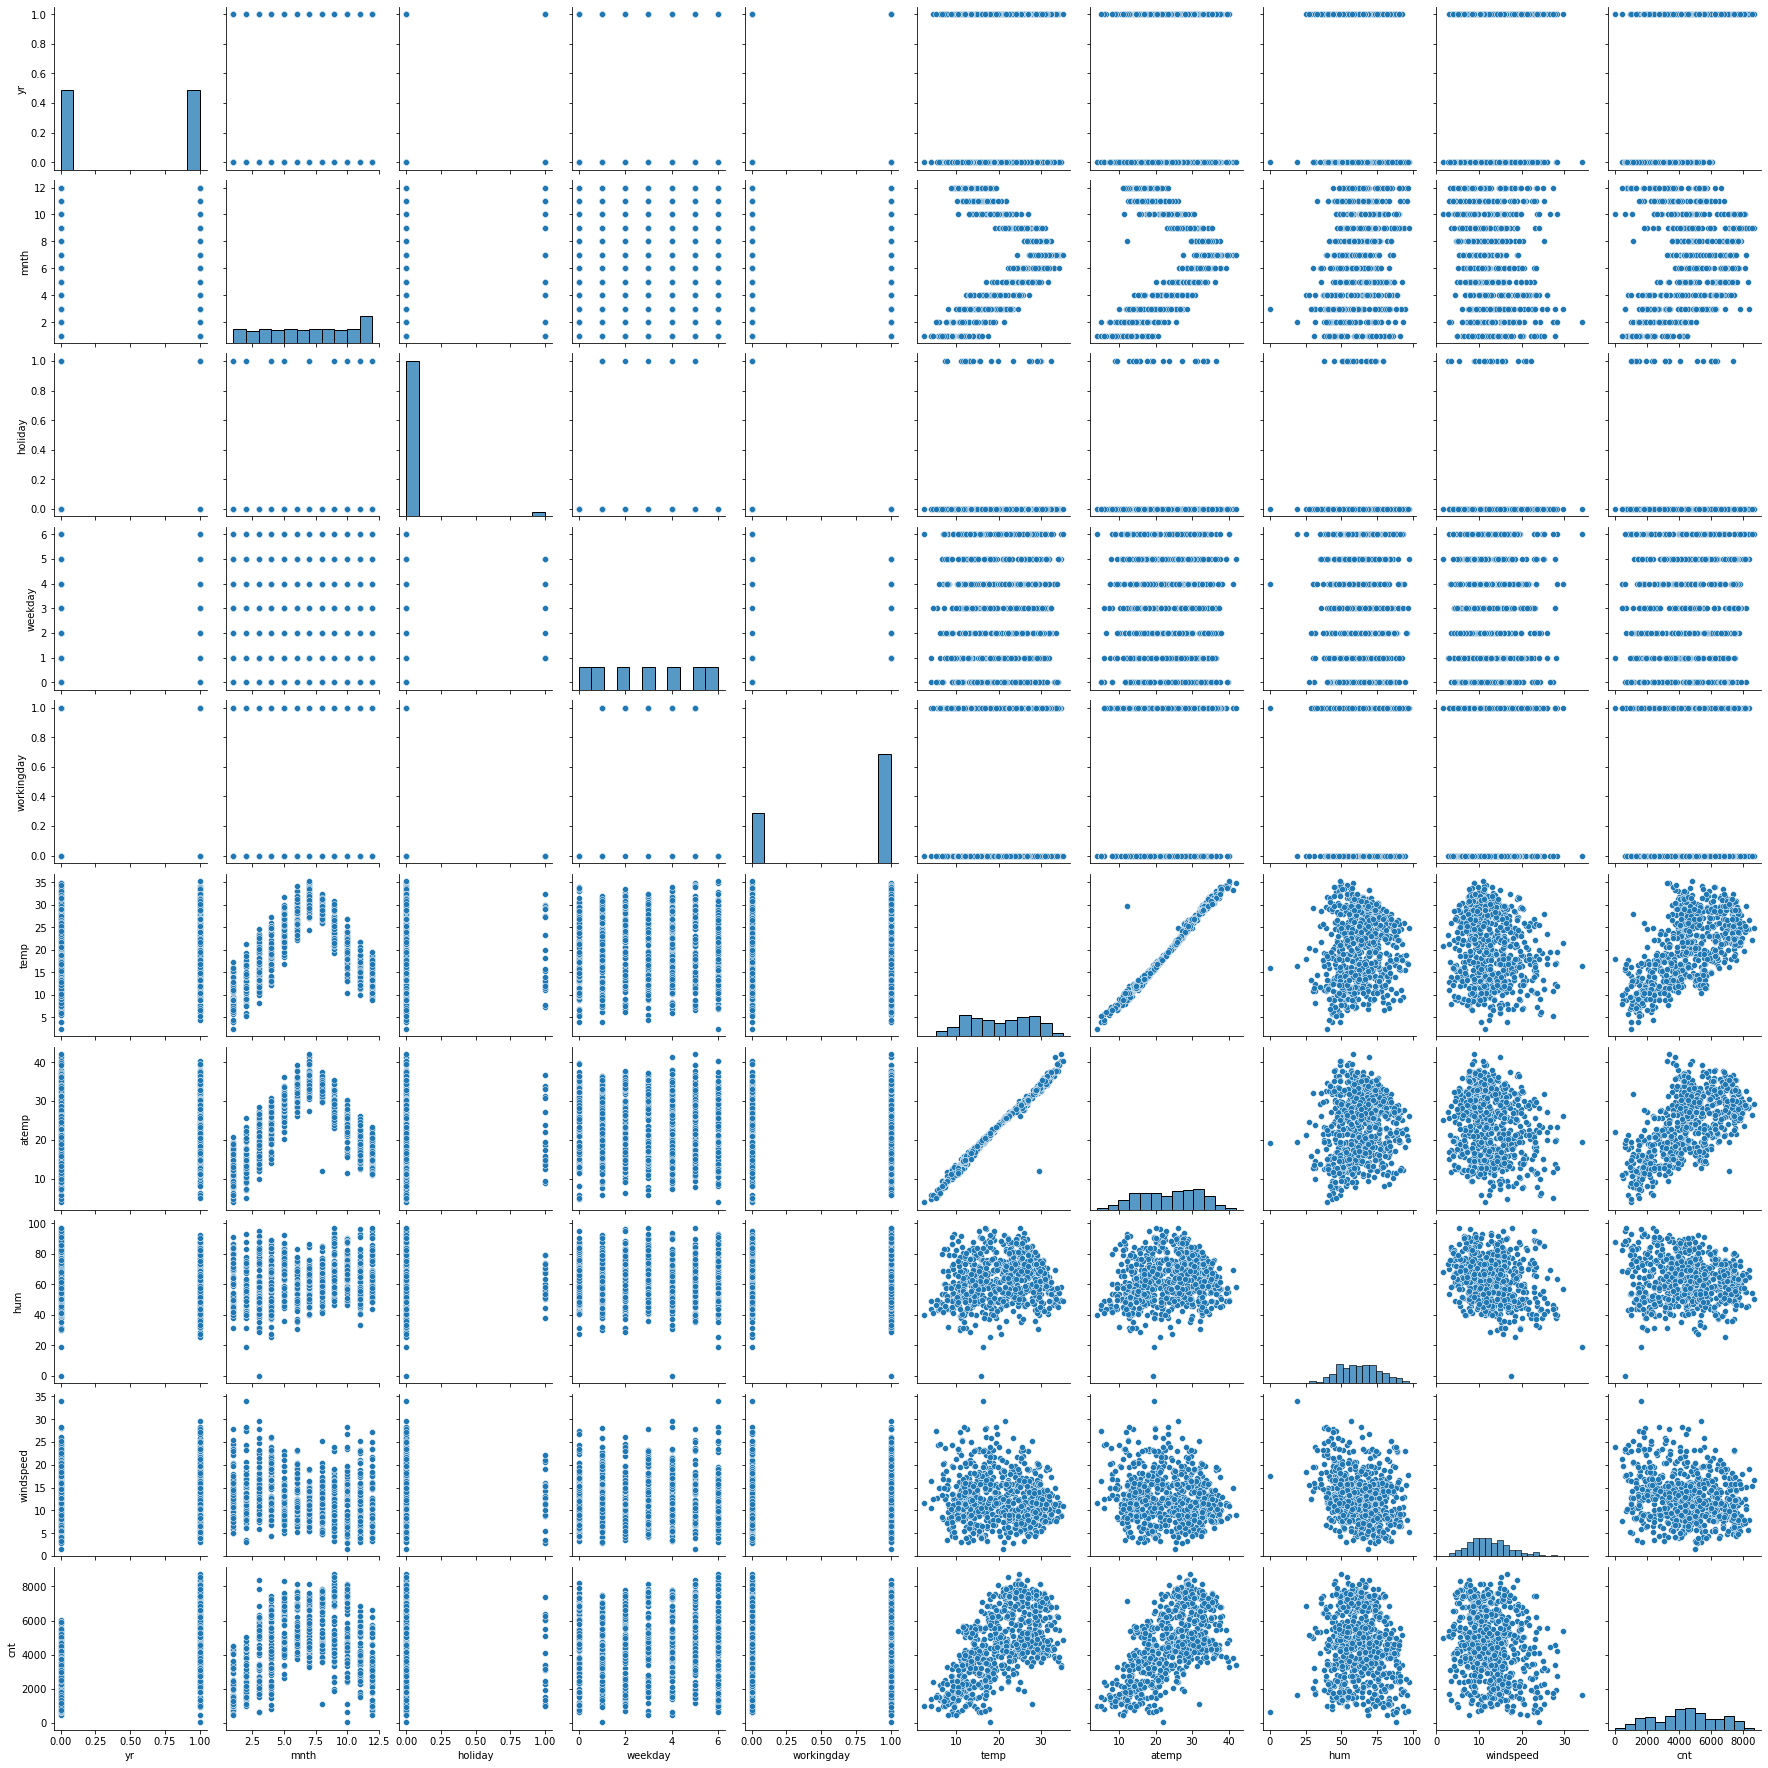

In [10]:
sns.pairplot(day)
plt.show()

###### From the above pair plot distribution, we can clearly see that the target variable has a comparatively good correlation with yr, temp and atemp variables.

##### Creating dummy variables for categorical variables:

In [28]:
day.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [22]:
dummy_var=pd.get_dummies(day['season'], drop_first= True)
dummy_var

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [27]:
day.weathersit.value_counts()

Clear       463
Moderate    246
Bad          21
Name: weathersit, dtype: int64

In [24]:
dummy_var2=pd.get_dummies(day['weathersit'], drop_first= True)
dummy_var2

,Clear,Moderate
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
725,0,1
726,0,1
727,0,1
728,1,0


##### concatinating the dummy variables to the original dataset:

In [29]:
day=pd.concat([day,dummy_var,dummy_var2], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Clear,Moderate
0,spring,0,1,0,6,0,Moderate,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,spring,0,1,0,0,0,Moderate,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0


##### Dropping weathersit and season as we have added their dummy variables to the dataset.

In [30]:
day=day.drop(day[['weathersit','season']], axis=1)

In [33]:
day.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'spring', 'summer', 'winter', 'Clear',
       'Moderate'],
      dtype='object')

##### Train-Test split:

In [35]:
day_train,day_test=train_test_split(day,train_size=0.7, random_state=100)

In [36]:
day_train.shape

(510, 15)

In [37]:
day_test.shape

(220, 15)

##### Rescaling the data

In [39]:
scaler=MinMaxScaler()

In [40]:
day.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Clear,Moderate
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0


##### Scaling the numeric variables.

In [41]:
num_vars=['temp','atemp','hum','windspeed','cnt']

##### Fitting the data

In [42]:
day_train[num_vars]=scaler.fit_transform(day_train[num_vars])

##### Training the model:

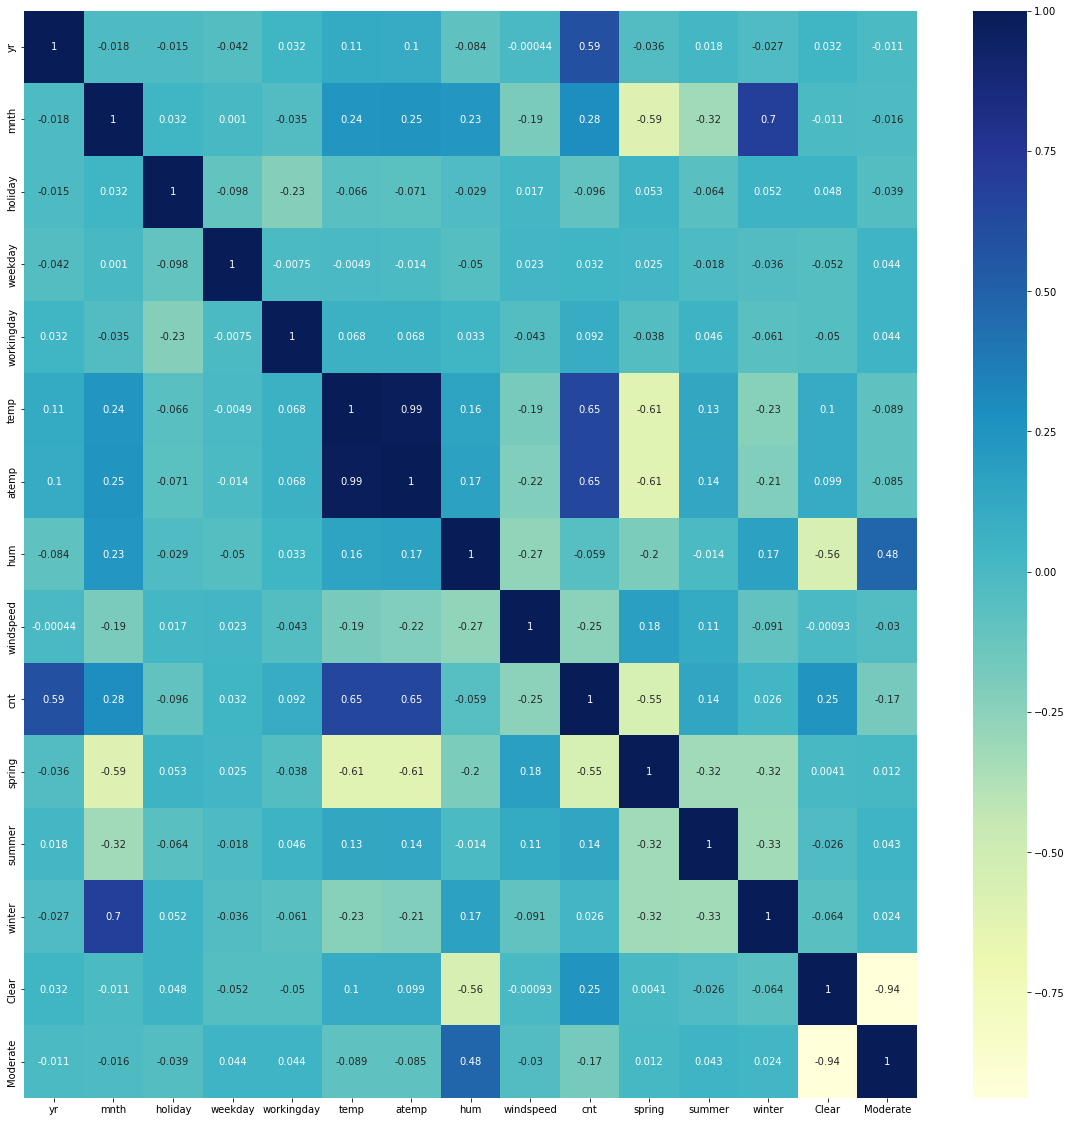

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(day_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

##### Extracting X_train and y_train

In [46]:
y_train=day_train.pop('cnt')
X_train=day_train

In [52]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [53]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Clear,Moderate
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,1
111,0,4,0,5,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,1


In [55]:
day.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'spring', 'summer', 'winter', 'Clear',
       'Moderate'],
      dtype='object')

##### Adding constant to X_train

In [56]:
X_train_sm=sm.add_constant(X_train)

##### Creating model

In [57]:
lr=sm.OLS(y_train,X_train_sm)

In [58]:
lr_model=lr.fit()

In [59]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     176.8
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          3.01e-182
Time:                        15:06:08   Log-Likelihood:                 495.79
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     495   BIC:                            -898.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0076      0.051     -0.149      0.882      -0.109       0.093
yr             0.2322      0.008     27.702      0.000       0.216       0.249
mnth           0.0014      0.002      0.578      0.563      -0.003       0.006
holiday       -0.0638      0.027     -2.351      0.019      -0.117      -0.010
weekday        0.0081      0.002      3.878      0.000       0.004       0.012
workingday     0.0187      0.009      2.059      0.040       0.001       0.037
temp           0.4329      0.139      3.118      0.002       0.160       0.706
atemp          0.0628      0.142      0.443      0.658      -0.216       0.342
hum           -0.1281      0.039     -3.288      0.001      -0.205      -0.052
windspeed     -0.1783      0.027     -6.597      0.000      -0.231      -0.125
spring        -0.0695      0.023     -3.013      0.003      -0.115      -0.024
summer         0.0473      0.016      3.027      0.003       0.017       0.078
winter         0.0835      0.019      4.472      0.000       0.047       0.120
Clear          0.2463      0.027      9.024      0.000       0.193       0.300
Moderate       0.1897      0.026      7.353      0.000       0.139       0.240
==============================================================================
Omnibus:                       73.421   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.997
Skew:                          -0.731   Prob(JB):                     4.08e-41
Kurtosis:                       5.572   Cond. No.                         388.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### checking VIF (Variance Inflation Factor)

In [62]:
vif=pd.DataFrame()

In [63]:
vif['Fratures']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by ="VIF", ascending=False)
vif

,Fratures,VIF
5,temp,381.19
6,atemp,366.13
7,hum,26.48
1,mnth,16.65
12,Clear,15.78
13,Moderate,9.37
9,spring,6.06
8,windspeed,4.96
11,winter,4.87
4,workingday,3.23


##### Removing atemp as it has highest p value and second highest VIF value

In [65]:
X= X_train.drop('atemp',axis=1)

##### Creating another model

In [66]:
X_train_sm=sm.add_constant(X)

In [67]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          2.35e-183
Time:                        15:21:06   Log-Likelihood:                 495.69
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0086      0.051     -0.168      0.867      -0.110       0.092
yr             0.2321      0.008     27.721      0.000       0.216       0.249
mnth           0.0014      0.002      0.581      0.561      -0.003       0.006
holiday       -0.0643      0.027     -2.375      0.018      -0.118      -0.011
weekday        0.0080      0.002      3.864      0.000       0.004       0.012
workingday     0.0187      0.009      2.058      0.040       0.001       0.037
temp           0.4925      0.034     14.427      0.000       0.425       0.560
hum           -0.1273      0.039     -3.274      0.001      -0.204      -0.051
windspeed     -0.1807      0.027     -6.817      0.000      -0.233      -0.129
spring        -0.0684      0.023     -2.985      0.003      -0.113      -0.023
summer         0.0485      0.015      3.152      0.002       0.018       0.079
winter         0.0848      0.018      4.614      0.000       0.049       0.121
Clear          0.2470      0.027      9.079      0.000       0.194       0.300
Moderate       0.1903      0.026      7.398      0.000       0.140       0.241
==============================================================================
Omnibus:                       72.086   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.883
Skew:                          -0.718   Prob(JB):                     1.94e-40
Kurtosis:                       5.558   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif=pd.DataFrame()
vif['Fratures']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by ="VIF", ascending=False)
vif

,Fratures,VIF
6,hum,26.46
5,temp,20.85
1,mnth,16.65
11,Clear,15.74
12,Moderate,9.35
8,spring,6.00
10,winter,4.75
7,windspeed,4.72
4,workingday,3.23
3,weekday,3.19


##### After removing atemp there is no difference in the R-squared value whereas the VIF values have significantly changed.

In [70]:
X1= X.drop('mnth',axis=1)

In [71]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          1.89e-184
Time:                        15:28:24   Log-Likelihood:                 495.52
No. Observations:                 510   AIC:                            -965.0
Df Residuals:                     497   BIC:                            -910.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.050     -0.021      0.983      -0.099       0.096
yr             0.2319      0.008     27.737      0.000       0.216       0.248
holiday       -0.0637      0.027     -2.357      0.019      -0.117      -0.011
weekday        0.0081      0.002      3.906      0.000       0.004       0.012
workingday     0.0186      0.009      2.048      0.041       0.001       0.036
temp           0.4933      0.034     14.475      0.000       0.426       0.560
hum           -0.1252      0.039     -3.236      0.001      -0.201      -0.049
windspeed     -0.1803      0.026     -6.810      0.000      -0.232      -0.128
spring        -0.0744      0.020     -3.645      0.000      -0.115      -0.034
summer         0.0444      0.014      3.245      0.001       0.018       0.071
winter         0.0892      0.017      5.319      0.000       0.056       0.122
Clear          0.2479      0.027      9.132      0.000       0.195       0.301
Moderate       0.1909      0.026      7.429      0.000       0.140       0.241
==============================================================================
Omnibus:                       72.339   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.291
Skew:                          -0.719   Prob(JB):                     9.59e-41
Kurtosis:                       5.570   Cond. No.                         60.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif=pd.DataFrame()
vif['Fratures']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by ="VIF", ascending=False)
vif

,Fratures,VIF
5,hum,24.01
4,temp,20.45
10,Clear,14.30
11,Moderate,8.89
7,spring,5.08
6,windspeed,4.64
9,winter,3.63
3,workingday,3.23
2,weekday,3.15
8,summer,2.55


##### After dropping the month column, we have found that R-squared value remains the same and there is a small difference in the VIF values

### Residual Analysis:

In [73]:
y_train_pred=lr_model.predict(X_train_sm)

Text(0.5, 0, 'Errors')

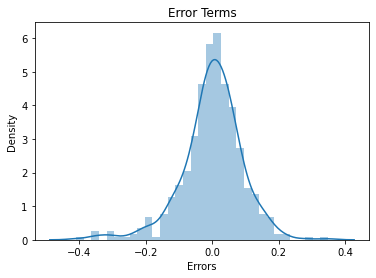

In [75]:
res=y_train - y_train_pred
sns.distplot(res)
plt.title('Error Terms')
plt.xlabel('Errors')

##### The Error terms are mostly distributed with mean 0. Thus moving forward.

##### Prediction and Evaluation on the Test set:

In [76]:
num_vars=['temp','atemp','hum','windspeed','cnt']

In [77]:
day_test[num_vars]=scaler.transform(day_test[num_vars])
day_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Clear,Moderate
184,0,7,1,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1
535,1,6,0,3,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0
299,0,10,0,4,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1
221,0,8,0,3,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0
152,0,6,0,4,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,1,0


In [78]:
y_test = day_test.pop('cnt')

In [79]:
X_test = day_test

In [80]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

In [81]:
X_test_sm.head()

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Clear,Moderate
184,1.0,0,7,1,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,1
535,1.0,1,6,0,3,1,0.901354,0.842587,0.610133,0.153728,0,1,0,1,0
299,1.0,0,10,0,4,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,1
221,1.0,0,8,0,3,1,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0
152,1.0,0,6,0,4,1,0.817246,0.741471,0.314298,0.537414,0,1,0,1,0


In [82]:
# Dropping variables that we dropped while training the dataset
X_test_sm = X_test_sm.drop(['mnth','atemp'], axis=1)
X_test_sm.head()

,const,yr,holiday,weekday,workingday,temp,hum,windspeed,spring,summer,winter,Clear,Moderate
184,1.0,0,1,1,0,0.831783,0.657364,0.084219,0,0,0,0,1
535,1.0,1,0,3,1,0.901354,0.610133,0.153728,0,1,0,1,0
299,1.0,0,0,4,1,0.511964,0.837699,0.334206,0,0,1,0,1
221,1.0,0,0,3,1,0.881625,0.437098,0.339570,0,0,0,1,0
152,1.0,0,0,4,1,0.817246,0.314298,0.537414,0,1,0,1,0


In [83]:
#Predicting the model
y_test_pred = lr_model.predict(X_test_sm)

In [87]:
round(r2_score(y_true = y_test, y_pred = y_test_pred),3)

0.81

### Conclusion:
    As we can see that the r2_score value is very close to R-squared value so we can conclude that whatever the model has learned on the training dataset, it is also able to generalize very well on the test dataset.
    - The most significant variables that can be used for predicting the demand for shared bikes are temp,year, weekdays & weather.
    - temp and yr are positively correlated with cnt so whenever the temp rises, the demand rises and every passing year,the demand for shared bikes is increasing.
    - During weekdays the the demand for bikes increases.
    - Weather also plays an important role in the demand for bike sharing as during clear and Moderate(mist+cloudy) weather, the demand is high as compared to when the weather is bad.